# Import Module & dataset

In [1]:
%pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install tensorflow
%pip install scikit-learn
%pip install arch
%pip install matplotlib
%pip install pandas
%pip install numpy
%pip install altair
%pip install statsmodels
%pip install scipy
%pip install yfinance
%pip install seaborn
%pip install keras-tuner

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import random
import altair as alt
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Reshape, GRU, Dense, Dropout
from sklearn.model_selection import train_test_split
import seaborn as sns
from keras_tuner import Hyperband
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import f1_score

Read Dataset

In [4]:
buku_000 = pd.read_csv('D:\\KuliYeah\\Season 7\\Arc Skripsi\\forecasting\\buku_000.csv')
buku_100 = pd.read_csv('D:\\KuliYeah\\Season 7\\Arc Skripsi\\forecasting\\buku_100.csv')
buku_200 = pd.read_csv('D:\\KuliYeah\\Season 7\\Arc Skripsi\\forecasting\\buku_200.csv')
buku_300 = pd.read_csv('D:\\KuliYeah\\Season 7\\Arc Skripsi\\forecasting\\buku_300.csv')
buku_400 = pd.read_csv('D:\\KuliYeah\\Season 7\\Arc Skripsi\\forecasting\\buku_400.csv')
buku_500 = pd.read_csv('D:\\KuliYeah\\Season 7\\Arc Skripsi\\forecasting\\buku_500.csv')
buku_600 = pd.read_csv('D:\\KuliYeah\\Season 7\\Arc Skripsi\\forecasting\\buku_600.csv')
buku_700 = pd.read_csv('D:\\KuliYeah\\Season 7\\Arc Skripsi\\forecasting\\buku_700.csv')
buku_800 = pd.read_csv('D:\\KuliYeah\\Season 7\\Arc Skripsi\\forecasting\\buku_800.csv')
buku_900 = pd.read_csv('D:\\KuliYeah\\Season 7\\Arc Skripsi\\forecasting\\buku_900.csv')

buku_000['Bulan'] = pd.to_datetime(buku_000['Bulan'], format='%m/%y')
buku_100['Bulan'] = pd.to_datetime(buku_100['Bulan'], format='%m/%y')
buku_200['Bulan'] = pd.to_datetime(buku_200['Bulan'], format='%m/%y')
buku_300['Bulan'] = pd.to_datetime(buku_300['Bulan'], format='%m/%y')
buku_400['Bulan'] = pd.to_datetime(buku_400['Bulan'], format='%m/%y')
buku_500['Bulan'] = pd.to_datetime(buku_500['Bulan'], format='%m/%y')
buku_600['Bulan'] = pd.to_datetime(buku_600['Bulan'], format='%m/%y')
buku_700['Bulan'] = pd.to_datetime(buku_700['Bulan'], format='%m/%y')
buku_800['Bulan'] = pd.to_datetime(buku_800['Bulan'], format='%m/%y')
buku_900['Bulan'] = pd.to_datetime(buku_900['Bulan'], format='%m/%y')

# Peminjaman buku kategori general

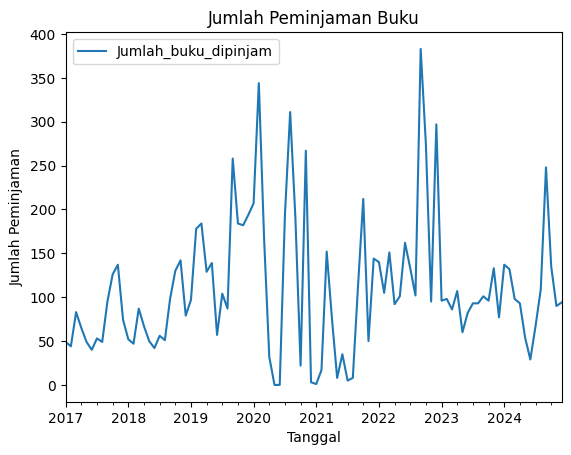

In [5]:
buku_000.plot(x='Bulan', y='Jumlah_buku_dipinjam', kind='line')
plt.title('Jumlah Peminjaman Buku')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Peminjaman')
plt.show()

Cek volatil

In [6]:
# Langkah 1: Periksa apakah ada nilai NaN di kolom 'Jumlah_buku_dipinjam'
print(f"Jumlah NaN di kolom 'Jumlah_buku_dipinjam': {buku_000['Jumlah_buku_dipinjam'].isna().sum()}")

# Jika ada NaN di kolom Jumlah_buku_dipinjam, hapus baris tersebut
buku_000_clean = buku_000.dropna(subset=['Jumlah_buku_dipinjam'])

# Langkah 2: Hitung perubahan persen antar periode
buku_000_clean['pct_change'] = buku_000_clean['Jumlah_buku_dipinjam'].pct_change()

# Langkah 3: Periksa apakah ada nilai inf atau -inf di kolom pct_change
print(f"Jumlah inf di kolom 'pct_change': {np.isinf(buku_000_clean['pct_change']).sum()}")

# Ganti nilai inf dengan NaN
buku_000_clean['pct_change'].replace([np.inf, -np.inf], np.nan, inplace=True)

# Hapus nilai NaN dari pct_change
df_clean = buku_000_clean['pct_change'].dropna()

# Langkah 4: Hitung standar deviasi dari perubahan persen
std_dev = np.std(df_clean)

# Langkah 5: Tampilkan standar deviasi
print(f'Standar deviasi dari perubahan persentase: {std_dev}')

# Langkah 6: Buat threshold untuk menentukan apakah data volatil atau tidak
threshold = 0.1  # Contoh threshold 10%
if std_dev > threshold:
    print("Data dianggap volatil")
else:
    print("Data tidak dianggap volatil")

Jumlah NaN di kolom 'Jumlah_buku_dipinjam': 0
Jumlah inf di kolom 'pct_change': 1
Standar deviasi dari perubahan persentase: 2.6074020771466637
Data dianggap volatil


C:\Users\asus\AppData\Local\Temp\ipykernel_19320\500041157.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  buku_000_clean['pct_change'].replace([np.inf, -np.inf], np.nan, inplace=True)


Outlier handling

In [7]:
# Menghitung Q1, Q3 dan IQR
Q1 = buku_000['Jumlah_buku_dipinjam'].quantile(0.25)
Q3 = buku_000['Jumlah_buku_dipinjam'].quantile(0.75)
IQR = Q3 - Q1

# Batas bawah dan atas untuk outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
buku_000
outliers_000 = buku_000[(buku_000['Jumlah_buku_dipinjam'] < lower_bound) | (buku_000['Jumlah_buku_dipinjam'] > upper_bound)]

print(outliers_000)
# Menampilkan batas bawah dan atas
print(f"Batas bawah: {lower_bound}")
print(f"Batas atas: {upper_bound}")

        Bulan  Jumlah_buku_dipinjam
37 2020-02-01                   344
43 2020-08-01                   311
68 2022-09-01                   383
69 2022-10-01                   274
71 2022-12-01                   297
Batas bawah: -74.5
Batas atas: 267.5


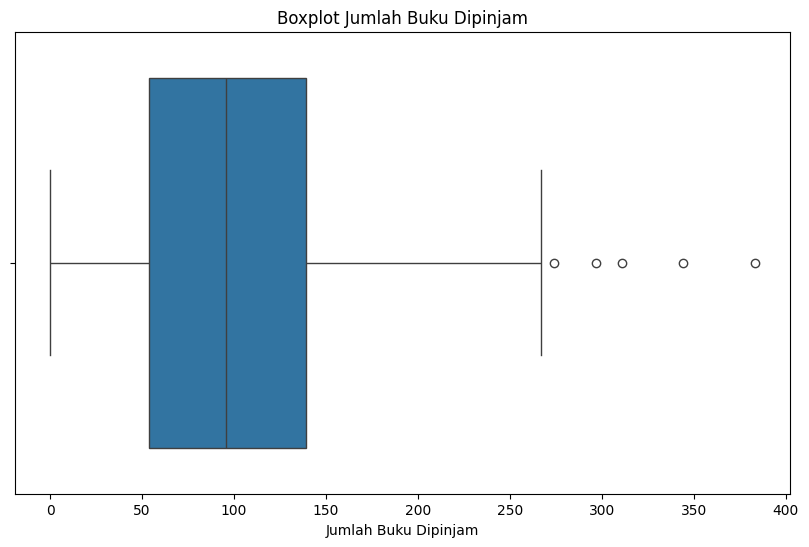

In [8]:
# Membuat boxplot untuk kolom 'Jumlah_buku_dipinjam'
plt.figure(figsize=(10, 6))
sns.boxplot(data=buku_000, x='Jumlah_buku_dipinjam')

# Menambahkan judul dan label
plt.title('Boxplot Jumlah Buku Dipinjam')
plt.xlabel('Jumlah Buku Dipinjam')

# Menampilkan boxplot
plt.show()


Rolling Window Median hyperparameter tuning

In [9]:
# Rentang hyperparameter
window_sizes = [3, 8, 9]  # Contoh rentang window size
tolerances = [2, 2.5, 3, 4]  # Contoh rentang tolerance

# Simpan hasil tuning
results = []

for window_size in window_sizes:
    for tolerance in tolerances:
        buku_000_copy = buku_000.copy()  # Buat salinan data asli agar tidak merusak data asli

        # Rolling median dan rolling std
        buku_000_copy['rolling_median'] = buku_000_copy['Jumlah_buku_dipinjam'].rolling(window=window_size, center=True).median()
        buku_000_copy['rolling_std'] = buku_000_copy['Jumlah_buku_dipinjam'].rolling(window=window_size, center=True).std()

        # Batas atas dan bawah
        upper_bound = buku_000_copy['rolling_median'] + tolerance * buku_000_copy['rolling_std']
        lower_bound = buku_000_copy['rolling_median'] - tolerance * buku_000_copy['rolling_std']

        # Deteksi outlier awal
        detected_outliers = (buku_000_copy['Jumlah_buku_dipinjam'] > upper_bound) | \
                            (buku_000_copy['Jumlah_buku_dipinjam'] < lower_bound)

        # Ganti outlier dengan rolling median
        buku_000_copy.loc[detected_outliers, 'Jumlah_buku_dipinjam'] = buku_000_copy.loc[detected_outliers, 'rolling_median']

        # Deteksi ulang outlier setelah penggantian
        buku_000_copy['rolling_median_after'] = buku_000_copy['Jumlah_buku_dipinjam'].rolling(window=window_size, center=True).median()
        buku_000_copy['rolling_std_after'] = buku_000_copy['Jumlah_buku_dipinjam'].rolling(window=window_size, center=True).std()

        upper_bound_after = buku_000_copy['rolling_median_after'] + tolerance * buku_000_copy['rolling_std_after']
        lower_bound_after = buku_000_copy['rolling_median_after'] - tolerance * buku_000_copy['rolling_std_after']

        detected_outliers_after = (buku_000_copy['Jumlah_buku_dipinjam'] > upper_bound_after) | \
                                (buku_000_copy['Jumlah_buku_dipinjam'] < lower_bound_after)

        num_outliers_after = detected_outliers_after.sum()  # Hitung jumlah outlier setelah penggantian

        # Simpan hasil
        results.append({
            'window_size': window_size,
            'tolerance': tolerance,
            'num_outliers_after': num_outliers_after  # Jumlah outlier setelah penggantian
        })

# Analisis hasil
results_df = pd.DataFrame(results)

best_result = results_df.sort_values(by='num_outliers_after').iloc[0]  # Pilih kombinasi dengan outlier paling sedikit

print("Kombinasi terbaik berdasarkan jumlah outlier setelah penggantian:")
print(best_result)

Kombinasi terbaik berdasarkan jumlah outlier setelah penggantian:
window_size           3.0
tolerance             2.0
num_outliers_after    0.0
Name: 0, dtype: float64


C:\Users\asus\AppData\Local\Temp\ipykernel_19320\3250660319.py:25: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[ 63.5 147.5  93.   92. ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  buku_000_copy.loc[detected_outliers, 'Jumlah_buku_dipinjam'] = buku_000_copy.loc[detected_outliers, 'rolling_median']


Outlier handling rolling window median

In [10]:
# Menghitung Moving Average atau Median
window_size = 3
# Menghitung Rolling Median
buku_000['rolling_median'] = buku_000['Jumlah_buku_dipinjam'].rolling(window=window_size, center=True).median()

# Menghitung batas toleransi outlier (misalnya 2 standar deviasi)
buku_000['rolling_std'] = buku_000['Jumlah_buku_dipinjam'].rolling(window=window_size, center=True).std()

# Batas atas dan bawah untuk deteksi outlier
tolerance = 2 # multiplier untuk standar deviasi
upper_bound = buku_000['rolling_median'] + tolerance * buku_000['rolling_std']
lower_bound = buku_000['rolling_median'] - tolerance * buku_000['rolling_std']

# Deteksi outlier
outliers = (buku_000['Jumlah_buku_dipinjam'] > upper_bound) | (buku_000['Jumlah_buku_dipinjam'] < lower_bound)

# Ganti outlier dengan rolling median
buku_000.loc[outliers, 'Jumlah_buku_dipinjam'] = buku_000.loc[outliers, 'rolling_median']

# Cek apakah masih ada outlier setelah penggantian
buku_000['rolling_median'] = buku_000['Jumlah_buku_dipinjam'].rolling(window=window_size, center=True).median()
buku_000['rolling_std'] = buku_000['Jumlah_buku_dipinjam'].rolling(window=window_size, center=True).std()

# Menghitung ulang batas atas dan bawah
upper_bound = buku_000['rolling_median'] + tolerance * buku_000['rolling_std']
lower_bound = buku_000['rolling_median'] - tolerance * buku_000['rolling_std']

# Deteksi ulang outlier
remaining_outliers = (buku_000['Jumlah_buku_dipinjam'] > upper_bound) | (buku_000['Jumlah_buku_dipinjam'] < lower_bound)

# Menampilkan jumlah outlier yang tersisa
print("Jumlah data yang masih outlier setelah handling:", remaining_outliers.sum())

# Drop kolom rolling mean dan rolling std (opsional)
buku_000.drop(columns=['rolling_median', 'rolling_std'], inplace=True)

# Menampilkan hasil
buku_000

Jumlah data yang masih outlier setelah handling: 0


,Bulan,Jumlah_buku_dipinjam
0,2017-01-01,49
1,2017-02-01,44
2,2017-03-01,83
3,2017-04-01,65
4,2017-05-01,49
...,...,...
91,2024-08-01,109
92,2024-09-01,248
93,2024-10-01,135
94,2024-11-01,90


Data split 70:30

Hyperparameter Tunning

In [11]:
# Data preprocessing
X = buku_000[['Jumlah_buku_dipinjam']].values
y = buku_000[['Jumlah_buku_dipinjam']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)
X_train = np.array(X_train).reshape((X_train.shape[0], 1, 1))
X_test = np.array(X_test).reshape((X_test.shape[0], 1, 1))

scaler = MinMaxScaler()
y_train_scaled = scaler.fit_transform(y_train)
y_test_scaled = scaler.transform(y_test)

# Parameter grid
param_grid = {
    'epochs': [50, 100, 170],
    'batch_size': [32, 64, 128],
    'units': [10, 20, 100],
    'filters': [16, 32, 128],
}

# Grid Search
best_rmse = float('inf')
best_params = None
results = []

# Iterate over parameter grid
for params in ParameterGrid(param_grid):
    print(f"Testing combination: {params}")
    
    # Build model
    model = Sequential()
    
    # CNN Layer
    model.add(Conv1D(filters=params['filters'], kernel_size=1, activation='relu', input_shape=(1, 1)))
    model.add(MaxPooling1D(pool_size=1))
    model.add(Flatten())
    
    # Reshape for GRU
    model.add(Reshape((1, params['filters'])))
    
    # GRU Layer
    model.add(GRU(units=params['units'], activation='relu'))
    
    # Output Layer
    model.add(Dense(1))
    
    # Compile model
    model.compile(optimizer=Adam(), loss='mean_squared_error')
    
    # Train model
    history = model.fit(X_train, y_train_scaled, epochs=params['epochs'], batch_size=params['batch_size'], verbose=0)
    
    # Evaluate model
    y_pred = model.predict(X_test)
    y_pred_inverse = scaler.inverse_transform(y_pred)
    y_test_inverse = scaler.inverse_transform(y_test_scaled)
    mse = mean_squared_error(y_test_inverse, y_pred_inverse)
    rmse = np.sqrt(mse)
    print(f"RMSE: {rmse}")
    
    # Store results
    results.append((params, rmse))
    
    # Update best parameters
    if rmse < best_rmse:
        best_rmse = rmse
        best_params = params

# Print best parameters and RMSE
print(f"Best RMSE: {best_rmse}")
print(f"Best parameters: {best_params}")

# Display all results
for res in results:
    print(f"Params: {res[0]} -> RMSE: {res[1]}")

Testing combination: {'batch_size': 32, 'epochs': 50, 'filters': 16, 'units': 10}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step
RMSE: 563.512967492409
Testing combination: {'batch_size': 32, 'epochs': 50, 'filters': 16, 'units': 20}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
RMSE: 38.01947875925317
Testing combination: {'batch_size': 32, 'epochs': 50, 'filters': 16, 'units': 100}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
RMSE: 22.57389902306543
Testing combination: {'batch_size': 32, 'epochs': 50, 'filters': 32, 'units': 10}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
RMSE: 1.9345047683747534
Testing combination: {'batch_size': 32, 'epochs': 50, 'filters': 32, 'units': 20}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
RMSE: 2.2461640270727616
Testing combination: {'batch_size': 32, 'epochs': 50, 'filters': 32, 'units': 100}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
RMSE: 2.138881582696636
Testing combination: {'batch_size': 32, 'epochs': 50, 'filters': 128, 'units': 10}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
RMSE: 6.965893271751544
Testing combination: {'batch_size': 32, 'epochs': 50, 'filters': 128, 'units': 20}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step
RMSE: 3.769369369665618
Testing combination: {'batch_size': 32, 'epochs': 50, 'filters': 128, 'units': 100}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
RMSE: 1.596517395906706
Testing combination: {'batch_size': 32, 'epochs': 100, 'filters': 16, 'units': 10}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
RMSE: 2.808216851063242
Testing combination: {'batch_size': 32, 'epochs': 100, 'filters': 16, 'units': 20}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 546ms/step
RMSE: 5.464670462281736
Testing combination: {'batch_size': 32, 'epochs': 100, 'filters': 16, 'units': 100}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
RMSE: 3.137622164641565
Testing combination: {'batch_size': 32, 'epochs': 100, 'filters': 32, 'units': 10}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
RMSE: 5.549887396160232
Testing combination: {'batch_size': 32, 'epochs': 100, 'filters': 32, 'units': 20}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
RMSE: 2.091246290299297
Testing combination: {'batch_size': 32, 'epochs': 100, 'filters': 32, 'units': 100}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step
RMSE: 8.170081444825964
Testing combination: {'batch_size': 32, 'epochs': 100, 'filters': 128, 'units': 10}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 623ms/step
RMSE: 2.8257919105893774
Testing combination: {'batch_size': 32, 'epochs': 100, 'filters': 128, 'units': 20}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step
RMSE: 11.903705019015957
Testing combination: {'batch_size': 32, 'epochs': 100, 'filters': 128, 'units': 100}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step
RMSE: 2.1425751163881075
Testing combination: {'batch_size': 32, 'epochs': 170, 'filters': 16, 'units': 10}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step
RMSE: 12.55260023434181
Testing combination: {'batch_size': 32, 'epochs': 170, 'filters': 16, 'units': 20}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step
RMSE: 4.749477603543709
Testing combination: {'batch_size': 32, 'epochs': 170, 'filters': 16, 'units': 100}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step
RMSE: 3.6237290726205234
Testing combination: {'batch_size': 32, 'epochs': 170, 'filters': 32, 'units': 10}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step
RMSE: 2.7287388704353543
Testing combination: {'batch_size': 32, 'epochs': 170, 'filters': 32, 'units': 20}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
RMSE: 0.5652709409011923
Testing combination: {'batch_size': 32, 'epochs': 170, 'filters': 32, 'units': 100}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 698ms/step
RMSE: 5.9968021958432605
Testing combination: {'batch_size': 32, 'epochs': 170, 'filters': 128, 'units': 10}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step
RMSE: 0.16212519321344968
Testing combination: {'batch_size': 32, 'epochs': 170, 'filters': 128, 'units': 20}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step
RMSE: 0.806535908825154
Testing combination: {'batch_size': 32, 'epochs': 170, 'filters': 128, 'units': 100}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
RMSE: 1.682897703889991
Testing combination: {'batch_size': 64, 'epochs': 50, 'filters': 16, 'units': 10}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step
RMSE: 19.56892578086762
Testing combination: {'batch_size': 64, 'epochs': 50, 'filters': 16, 'units': 20}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
RMSE: 5.274182980041337
Testing combination: {'batch_size': 64, 'epochs': 50, 'filters': 16, 'units': 100}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step
RMSE: 5.176726785538973
Testing combination: {'batch_size': 64, 'epochs': 50, 'filters': 32, 'units': 10}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step
RMSE: 0.7219516870245402
Testing combination: {'batch_size': 64, 'epochs': 50, 'filters': 32, 'units': 20}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step
RMSE: 20.936853976868065
Testing combination: {'batch_size': 64, 'epochs': 50, 'filters': 32, 'units': 100}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
RMSE: 11.831432180391127
Testing combination: {'batch_size': 64, 'epochs': 50, 'filters': 128, 'units': 10}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
RMSE: 1.662673463177299
Testing combination: {'batch_size': 64, 'epochs': 50, 'filters': 128, 'units': 20}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
RMSE: 37.20534566937612
Testing combination: {'batch_size': 64, 'epochs': 50, 'filters': 128, 'units': 100}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
RMSE: 9.435046710988976
Testing combination: {'batch_size': 64, 'epochs': 100, 'filters': 16, 'units': 10}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 589ms/step
RMSE: 47.793452369635396
Testing combination: {'batch_size': 64, 'epochs': 100, 'filters': 16, 'units': 20}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step
RMSE: 14.916750336113639
Testing combination: {'batch_size': 64, 'epochs': 100, 'filters': 16, 'units': 100}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step
RMSE: 5.636739869359335
Testing combination: {'batch_size': 64, 'epochs': 100, 'filters': 32, 'units': 10}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 551ms/step
RMSE: 0.4646257575333817
Testing combination: {'batch_size': 64, 'epochs': 100, 'filters': 32, 'units': 20}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step
RMSE: 31.410895131940922
Testing combination: {'batch_size': 64, 'epochs': 100, 'filters': 32, 'units': 100}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step
RMSE: 1.9701755442008415
Testing combination: {'batch_size': 64, 'epochs': 100, 'filters': 128, 'units': 10}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
RMSE: 9.061942966209989
Testing combination: {'batch_size': 64, 'epochs': 100, 'filters': 128, 'units': 20}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
RMSE: 0.2743547112554172
Testing combination: {'batch_size': 64, 'epochs': 100, 'filters': 128, 'units': 100}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
RMSE: 2.5000976995065955
Testing combination: {'batch_size': 64, 'epochs': 170, 'filters': 16, 'units': 10}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step
RMSE: 1.991995098077417
Testing combination: {'batch_size': 64, 'epochs': 170, 'filters': 16, 'units': 20}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step
RMSE: 2.0373082270066454
Testing combination: {'batch_size': 64, 'epochs': 170, 'filters': 16, 'units': 100}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step
RMSE: 4.91486827425257
Testing combination: {'batch_size': 64, 'epochs': 170, 'filters': 32, 'units': 10}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step
RMSE: 133.9819492913783
Testing combination: {'batch_size': 64, 'epochs': 170, 'filters': 32, 'units': 20}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
RMSE: 7.855990815858673
Testing combination: {'batch_size': 64, 'epochs': 170, 'filters': 32, 'units': 100}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
RMSE: 3.8271704640741824
Testing combination: {'batch_size': 64, 'epochs': 170, 'filters': 128, 'units': 10}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
RMSE: 2.3820493706642076
Testing combination: {'batch_size': 64, 'epochs': 170, 'filters': 128, 'units': 20}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
RMSE: 3.4215808105209153
Testing combination: {'batch_size': 64, 'epochs': 170, 'filters': 128, 'units': 100}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
RMSE: 1.59083836214477
Testing combination: {'batch_size': 128, 'epochs': 50, 'filters': 16, 'units': 10}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step
RMSE: 423.2953483496411
Testing combination: {'batch_size': 128, 'epochs': 50, 'filters': 16, 'units': 20}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 547ms/step
RMSE: 749.6710196824171
Testing combination: {'batch_size': 128, 'epochs': 50, 'filters': 16, 'units': 100}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 604ms/step
RMSE: 45.13197761703287
Testing combination: {'batch_size': 128, 'epochs': 50, 'filters': 32, 'units': 10}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step
RMSE: 19.887499151890562
Testing combination: {'batch_size': 128, 'epochs': 50, 'filters': 32, 'units': 20}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step
RMSE: 127.45056016833469
Testing combination: {'batch_size': 128, 'epochs': 50, 'filters': 32, 'units': 100}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
RMSE: 37.930682439884194
Testing combination: {'batch_size': 128, 'epochs': 50, 'filters': 128, 'units': 10}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
RMSE: 30.35530397967985
Testing combination: {'batch_size': 128, 'epochs': 50, 'filters': 128, 'units': 20}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
RMSE: 101.33041951743205
Testing combination: {'batch_size': 128, 'epochs': 50, 'filters': 128, 'units': 100}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
RMSE: 31.629186551779643
Testing combination: {'batch_size': 128, 'epochs': 100, 'filters': 16, 'units': 10}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
RMSE: 12.192105929432932
Testing combination: {'batch_size': 128, 'epochs': 100, 'filters': 16, 'units': 20}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
RMSE: 3.908724412108681
Testing combination: {'batch_size': 128, 'epochs': 100, 'filters': 16, 'units': 100}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
RMSE: 25.271132956330714
Testing combination: {'batch_size': 128, 'epochs': 100, 'filters': 32, 'units': 10}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
RMSE: 6.285406138848432
Testing combination: {'batch_size': 128, 'epochs': 100, 'filters': 32, 'units': 20}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step
RMSE: 6.171097182805401
Testing combination: {'batch_size': 128, 'epochs': 100, 'filters': 32, 'units': 100}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
RMSE: 5.442524529005982
Testing combination: {'batch_size': 128, 'epochs': 100, 'filters': 128, 'units': 10}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
RMSE: 36.21744077516365
Testing combination: {'batch_size': 128, 'epochs': 100, 'filters': 128, 'units': 20}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
RMSE: 12.019047790238204
Testing combination: {'batch_size': 128, 'epochs': 100, 'filters': 128, 'units': 100}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
RMSE: 7.071530165422104
Testing combination: {'batch_size': 128, 'epochs': 170, 'filters': 16, 'units': 10}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
RMSE: 15.745625560171616
Testing combination: {'batch_size': 128, 'epochs': 170, 'filters': 16, 'units': 20}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
RMSE: 2.598788965237235
Testing combination: {'batch_size': 128, 'epochs': 170, 'filters': 16, 'units': 100}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
RMSE: 3.1363054829129378
Testing combination: {'batch_size': 128, 'epochs': 170, 'filters': 32, 'units': 10}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
RMSE: 0.3869168716258755
Testing combination: {'batch_size': 128, 'epochs': 170, 'filters': 32, 'units': 20}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
RMSE: 1.1114374258023656
Testing combination: {'batch_size': 128, 'epochs': 170, 'filters': 32, 'units': 100}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
RMSE: 3.489874402201944
Testing combination: {'batch_size': 128, 'epochs': 170, 'filters': 128, 'units': 10}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
RMSE: 1.3351100160288394
Testing combination: {'batch_size': 128, 'epochs': 170, 'filters': 128, 'units': 20}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
RMSE: 0.8225453477716376
Testing combination: {'batch_size': 128, 'epochs': 170, 'filters': 128, 'units': 100}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
RMSE: 1.0083428892614625
Best RMSE: 0.16212519321344968
Best parameters: {'batch_size': 32, 'epochs': 170, 'filters': 128, 'units': 10}
Params: {'batch_size': 32, 'epochs': 50, 'filters': 16, 'units': 10} -> RMSE: 563.512967492409
Params: {'batch_size': 32, 'epochs': 50, 'filters': 16, 'units': 20} -> RMSE: 38.01947875925317
Params: {'batch_size': 32, 'epochs': 50, 'filters': 16, 'units': 100} -> RMSE: 22.57389902306543
Params: {'batch_size': 32, 'epochs': 50, 'filters': 32, 'units': 10} -> RMSE: 1.9345047683747534
Params: {'batch_size': 32, 'epochs': 50, 'filters': 32, 'units': 20} -> RMSE: 2.2461640270727616
Params: {'batch_size': 32, 'epochs': 50, 'filters': 32, 'units': 100} -> RMSE: 2.138881582696636
Params: {'batch_size': 32, 'epochs': 50, 'filters': 128, 'units': 10} -> RMSE: 6.965893271751544
Params: {'batch_size': 32, 'epochs': 50, 'filters': 128, 'units': 20} -> RMSE: 3.769369369665618
Params: {'batch_size': 32, 'epochs': 50, 'filters': 

Model CNN-GRU

Data split 70:30

Epoch 1/170


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 74.3004
Epoch 2/170
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 28.3440
Epoch 3/170
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.2658
Epoch 4/170
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.2423
Epoch 5/170
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5322
Epoch 6/170
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6334 
Epoch 7/170
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1072
Epoch 8/170
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6624
Epoch 9/170
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5067
Epoch 10/170
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0435
Epoch 11/170
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1429
Epoch 12/170
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2179
Epoch 13/170
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0161 
Epoch 14/170
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0942
Epoch 15/170
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1262
Epoch 16/170
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2

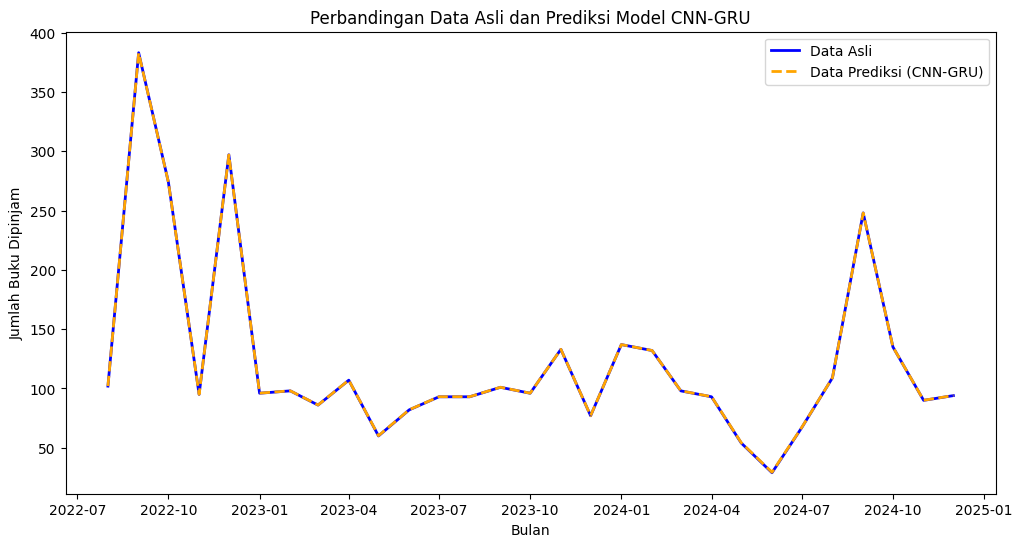

In [16]:
# Memisahkan fitur dan target
X = buku_000[['Jumlah_buku_dipinjam']]  # Changed here
y = buku_000[['Jumlah_buku_dipinjam']]  # Changed here

# Split data menjadi data latih dan data uji (70% latih, 30% uji)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

# Reshape input menjadi tiga dimensi
# Menggunakan 1 timestep (karena kita menggunakan data dari saat ini saja)
X_train = np.array(X_train).reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = np.array(X_test).reshape((X_test.shape[0], 1, X_test.shape[1]))

# Normalisasi data (opsional jika diperlukan oleh model RNN)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler.transform(y_test.values.reshape(-1, 1))

# Tentukan input shape
input_shape = (X_train.shape[1], X_train.shape[2])

# Model CNN-GRU
model_cnn_gru = Sequential()

# Lapisan CNN untuk ekstraksi fitur
model_cnn_gru.add(Conv1D(filters=128, kernel_size=1, activation='relu', input_shape=input_shape))
model_cnn_gru.add(MaxPooling1D(pool_size=1))
model_cnn_gru.add(Flatten())

# Ubah kembali ke bentuk tiga dimensi untuk input ke GRU
model_cnn_gru.add(Reshape((1, -1)))

# Lapisan GRU setelah CNN
model_cnn_gru.add(GRU(10, activation='relu'))

# Lapisan output
model_cnn_gru.add(Dense(1))

# Kompilasi model
model_cnn_gru.compile(optimizer='adam', loss='mean_squared_error')

# Latih model
model_cnn_gru.fit(X_train, y_train_scaled, epochs=170, batch_size=32)

# Prediksi pada data uji
y_pred_cnn_gru = model_cnn_gru.predict(X_test)

y_pred_cnn_gru_inverse = scaler.inverse_transform(y_pred_cnn_gru)
y_test_scaled_inverse = scaler.inverse_transform(y_test_scaled)

# Evaluasi model
mse = mean_squared_error(y_test_scaled_inverse, y_pred_cnn_gru_inverse)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test_scaled_inverse, y_pred_cnn_gru_inverse) * 100

print(f"RMSE: {rmse}")
print(f"MAPE: {mape:.2f}%")

# Visualisasi hasil prediksi dari model CNN-GRU
bulan = buku_000.iloc[-len(y_test):]['Bulan'].values  # Ambil data bulan dari data uji
plt.figure(figsize=(12, 6))
plt.plot(bulan, y_test_scaled_inverse, label='Data Asli', color='blue', linewidth=2)
plt.plot(bulan, y_pred_cnn_gru_inverse, label='Data Prediksi (CNN-GRU)', color='orange', linestyle='--', linewidth=2)
plt.xlabel('Bulan')
plt.ylabel('Jumlah Buku Dipinjam')
plt.title('Perbandingan Data Asli dan Prediksi Model CNN-GRU')
plt.legend()
plt.show()

Data split 80:20

Epoch 1/170


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.3906
Epoch 2/170
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5369
Epoch 3/170
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1358 
Epoch 4/170
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1003 
Epoch 5/170
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0339
Epoch 6/170
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0287
Epoch 7/170
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0446
Epoch 8/170
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0472 
Epoch 9/170
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0277
Epoch 10/170
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0066 
Epoch 11/170
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0069
Epoch 12/170
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0027 
Epoch 13/170
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0026
Epoch 14/170
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0024
Epoch 15/170
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0019
Epoch 16/170
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 

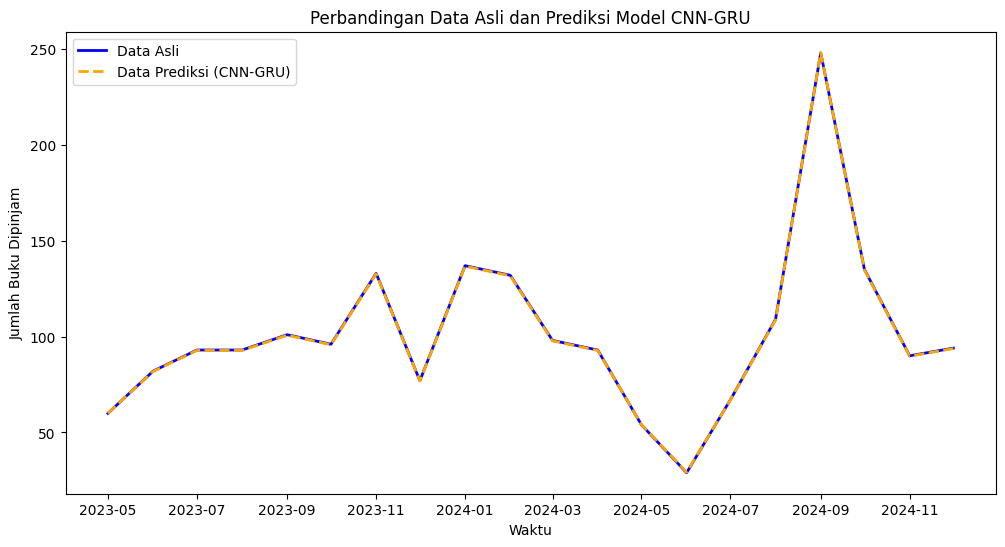

In [18]:
# Memisahkan fitur dan target
X = buku_000[['Jumlah_buku_dipinjam']]  # Changed here
y = buku_000[['Jumlah_buku_dipinjam']]  # Changed here

# Split data menjadi data latih dan data uji (80% latih, 20% uji)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Reshape input menjadi tiga dimensi
# Menggunakan 1 timestep (karena kita menggunakan data dari saat ini saja)
X_train = np.array(X_train).reshape((X_train.shape[0], 1, X_train.shape[1]))  # timesteps=1
X_test = np.array(X_test).reshape((X_test.shape[0], 1, X_test.shape[1]))  # timesteps=1


# Normalisasi data (opsional jika diperlukan oleh model RNN)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler.transform(y_test.values.reshape(-1, 1))

# Tentukan input shape
input_shape = (X_train.shape[1], X_train.shape[2])

# Model CNN-GRU
model_cnn_gru = Sequential()

# Lapisan CNN untuk ekstraksi fitur
model_cnn_gru.add(Conv1D(filters=128, kernel_size=1, activation='relu', input_shape=input_shape))
model_cnn_gru.add(MaxPooling1D(pool_size=1))
model_cnn_gru.add(Flatten())

# Ubah kembali ke bentuk tiga dimensi untuk input ke GRU
model_cnn_gru.add(Reshape((1, -1)))

# Lapisan GRU setelah CNN
model_cnn_gru.add(GRU(10, activation='relu'))

# Lapisan output
model_cnn_gru.add(Dense(1))

# Kompilasi model
model_cnn_gru.compile(optimizer='adam', loss='mean_squared_error')

# Latih model
model_cnn_gru.fit(X_train, y_train_scaled, epochs=170, batch_size=32)

# Prediksi pada data uji
y_pred_cnn_gru = model_cnn_gru.predict(X_test)

y_pred_cnn_gru_inverse = scaler.inverse_transform(y_pred_cnn_gru)
y_test_scaled_inverse = scaler.inverse_transform(y_test_scaled)

# Evaluasi model
mse = mean_squared_error(y_test_scaled_inverse, y_pred_cnn_gru_inverse)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test_scaled_inverse, y_pred_cnn_gru_inverse) * 100

print(f"RMSE: {rmse}")
print(f"MAPE: {mape:.2f}%")

# Visualisasi hasil prediksi dari model CNN-GRU
bulan = buku_000.iloc[-len(y_test):]['Bulan'].values  # Ambil data bulan dari data uji
plt.figure(figsize=(12, 6))
plt.plot(bulan, y_test_scaled_inverse, label='Data Asli', color='blue', linewidth=2)
plt.plot(bulan, y_pred_cnn_gru_inverse, label='Data Prediksi (CNN-GRU)', color='orange', linestyle='--', linewidth=2)
plt.xlabel('Waktu')
plt.ylabel('Jumlah Buku Dipinjam')
plt.title('Perbandingan Data Asli dan Prediksi Model CNN-GRU')
plt.legend()
plt.show()

Data split 90:10

Epoch 1/170


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 9.1301 
Epoch 2/170
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.1561
Epoch 3/170
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8700 
Epoch 4/170
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.6909
Epoch 5/170
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.1193
Epoch 6/170
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8807 
Epoch 7/170
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2687
Epoch 8/170
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4380 
Epoch 9/170
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4290
Epoch 10/170
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1733
Epoch 11/170
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1052
Epoch 12/170
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0798 
Epoch 13/170
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0689
Epoch 14/170
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0827
Epoch 15/170
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0822
Epoch 16/170
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 

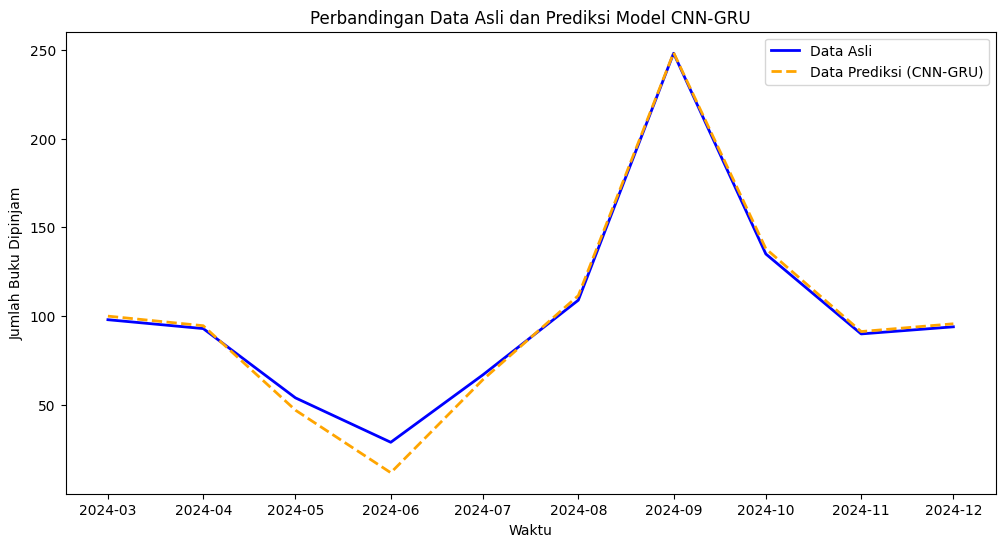

In [19]:
# Memisahkan fitur dan target
X = buku_000[['Jumlah_buku_dipinjam']]  # Changed here
y = buku_000[['Jumlah_buku_dipinjam']]  # Changed here

# Split data menjadi data latih dan data uji (90% latih, 10% uji)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)

# Reshape input menjadi tiga dimensi
# Menggunakan 1 timestep (karena kita menggunakan data dari saat ini saja)
X_train = np.array(X_train).reshape((X_train.shape[0], 1, X_train.shape[1]))  # timesteps=1
X_test = np.array(X_test).reshape((X_test.shape[0], 1, X_test.shape[1]))  # timesteps=1


# Normalisasi data (opsional jika diperlukan oleh model RNN)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler.transform(y_test.values.reshape(-1, 1))

# Tentukan input shape
input_shape = (X_train.shape[1], X_train.shape[2])

# Model CNN-GRU
model_cnn_gru = Sequential()

# Lapisan CNN untuk ekstraksi fitur
model_cnn_gru.add(Conv1D(filters=128, kernel_size=1, activation='relu', input_shape=input_shape))
model_cnn_gru.add(MaxPooling1D(pool_size=1))
model_cnn_gru.add(Flatten())

# Ubah kembali ke bentuk tiga dimensi untuk input ke GRU
model_cnn_gru.add(Reshape((1, -1)))

# Lapisan GRU setelah CNN
model_cnn_gru.add(GRU(10, activation='relu'))

# Lapisan output
model_cnn_gru.add(Dense(1))

# Kompilasi model
model_cnn_gru.compile(optimizer='adam', loss='mean_squared_error')

# Latih model
model_cnn_gru.fit(X_train, y_train_scaled, epochs=170, batch_size=32)

# Prediksi pada data uji
y_pred_cnn_gru = model_cnn_gru.predict(X_test)

y_pred_cnn_gru_inverse = scaler.inverse_transform(y_pred_cnn_gru)
y_test_scaled_inverse = scaler.inverse_transform(y_test_scaled)

# Evaluasi model
mse = mean_squared_error(y_test_scaled_inverse, y_pred_cnn_gru_inverse)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test_scaled_inverse, y_pred_cnn_gru_inverse) * 100

print(f"RMSE: {rmse}")
print(f"MAPE: {mape:.2f}%")

# Visualisasi hasil prediksi dari model CNN-GRU
bulan = buku_000.iloc[-len(y_test):]['Bulan'].values  # Ambil data bulan dari data uji
plt.figure(figsize=(12, 6))
plt.plot(bulan, y_test_scaled_inverse, label='Data Asli', color='blue', linewidth=2)
plt.plot(bulan, y_pred_cnn_gru_inverse, label='Data Prediksi (CNN-GRU)', color='orange', linestyle='--', linewidth=2)
plt.xlabel('Waktu')
plt.ylabel('Jumlah Buku Dipinjam')
plt.title('Perbandingan Data Asli dan Prediksi Model CNN-GRU')
plt.legend()
plt.show()

Forecasting 12 bulan kedepan

In [ ]:
# Tentukan jumlah minggu yang ingin digunakan sebagai input
timesteps = 50  # Menggunakan 12 minggu terakhir sebagai konteks

# Fungsi untuk membuat data dengan sliding window
def create_sliding_window_data(data, timesteps):
    X, y = [], []
    for i in range(len(data) - timesteps):
        X.append(data[i:i + timesteps])
        y.append(data[i + timesteps])
    return np.array(X), np.array(y)

# Scaling data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(buku_000['Jumlah_buku_dipinjam'].values.reshape(-1, 1))

# Membuat data latih dengan sliding window
X, y = create_sliding_window_data(data_scaled, timesteps)
X_train, X_test = X[:-1], X[-1:]  # Menggunakan data terakhir di X_test untuk memulai prediksi
y_train = y[:-1]  # Tidak membutuhkan y_test di sini

# Model CNN-GRU
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=1, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(MaxPooling1D(pool_size=1))
model.add(GRU(50, activation='relu'))
model.add(Dense(1))

# Kompilasi model
model.compile(optimizer='adam', loss='mean_squared_error')

# Latih model
model.fit(X_train, y_train, epochs=170, batch_size=32, verbose=1)

# Hybrid Prediction: Prediksi Minggu Pertama + Iterasi untuk Prediksi 11 Minggu Berikutnya
predictions = []

# Prediksi minggu pertama
pred_first = model.predict(X_test)
predictions.append(pred_first[0, 0])

# Iterasi untuk prediksi minggu berikutnya
last_data = np.concatenate([X_test[:, 1:, :], np.array(pred_first).reshape((1, 1, 1))], axis=1)

for i in range(11):  # Melanjutkan untuk 11 minggu berikutnya
    pred = model.predict(last_data)
    predictions.append(pred[0, 0])

    # Update last_data dengan prediksi baru
    new_input = np.array(pred).reshape((1, 1, 1))
    last_data = np.concatenate([last_data[:, 1:, :], new_input], axis=1)

# Denormalisasi hasil prediksi ke skala asli
predictions_original = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# Adjust future dates to start immediately after the last known date in the dataset
last_date = buku_000['Bulan'].iloc[-1]
future_dates = pd.date_range(last_date, periods=12, freq='M')

# Adjust future dates to start immediately after the last known date in the dataset
last_date = buku_000['Bulan'].iloc[-1]
future_dates = pd.date_range(last_date + pd.DateOffset(months=1), periods=12, freq='M')

# Ensure predictions have only 12 values
predictions_original = predictions_original[:12]

# Combine actual data with forecast for a continuous line
combined_data = np.concatenate([scaler.inverse_transform(data_scaled).flatten(), predictions_original.flatten()])
combined_dates = pd.date_range(buku_000['Bulan'].iloc[0], periods=len(combined_data), freq='M')

# Plot the combined actual and forecasted values
plt.figure(figsize=(12, 6))
plt.plot(combined_dates, combined_data, label='Actual + Forecast', color='orange')
plt.axvline(last_date, color='gray', linestyle='--', label='Forecast Start')
plt.title('Forecast of Peminjaman Buku for Next 12 Months Using CNN-GRU (Hybrid)')
plt.xlabel('Tanggal')
plt.ylabel('Peminjaman Buku')
plt.legend()
plt.xticks(rotation=45)
plt.show()


# Peminjaman buku kategori filosofi dan psikologi

In [ ]:
buku_100.plot(x='Bulan', y='Jumlah_buku_dipinjam', kind='line')
plt.title('Jumlah Peminjaman Buku')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Peminjaman')
plt.show()

Cek volatil

In [ ]:
import pandas as pd
import numpy as np

# Misal buku_100 adalah DataFrame yang berisi data Anda

# Langkah 1: Periksa apakah ada nilai NaN di kolom 'Jumlah_buku_dipinjam'
print(f"Jumlah NaN di kolom 'Jumlah_buku_dipinjam': {buku_100['Jumlah_buku_dipinjam'].isna().sum()}")

# Jika ada NaN di kolom Jumlah_buku_dipinjam, hapus baris tersebut
buku_100_clean = buku_100.dropna(subset=['Jumlah_buku_dipinjam'])

# Langkah 2: Hitung perubahan persen antar periode
buku_100_clean['pct_change'] = buku_100_clean['Jumlah_buku_dipinjam'].pct_change()

# Langkah 3: Periksa apakah ada nilai inf atau -inf di kolom pct_change
print(f"Jumlah inf di kolom 'pct_change': {np.isinf(buku_100_clean['pct_change']).sum()}")

# Ganti nilai inf dengan NaN
buku_100_clean['pct_change'].replace([np.inf, -np.inf], np.nan, inplace=True)

# Hapus nilai NaN dari pct_change
df_clean = buku_100_clean['pct_change'].dropna()

# Langkah 4: Hitung standar deviasi dari perubahan persen
std_dev = np.std(df_clean)

# Langkah 5: Tampilkan standar deviasi
print(f'Standar deviasi dari perubahan persentase: {std_dev}')

# Langkah 6: Buat threshold untuk menentukan apakah data volatil atau tidak
threshold = 0.1  # Contoh threshold 10%
if std_dev > threshold:
    print("Data dianggap volatil")
else:
    print("Data tidak dianggap volatil")

Outlier handling

In [ ]:
# Menghitung Q1, Q3 dan IQR
Q1 = buku_100['Jumlah_buku_dipinjam'].quantile(0.25)
Q3 = buku_100['Jumlah_buku_dipinjam'].quantile(0.75)
IQR = Q3 - Q1

# Batas bawah dan atas untuk outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
buku_100
outliers_000 = buku_100[(buku_100['Jumlah_buku_dipinjam'] < lower_bound) | (buku_100['Jumlah_buku_dipinjam'] > upper_bound)]

print(outliers_000)
# Menampilkan batas bawah dan atas
print(f"Batas bawah: {lower_bound}")
print(f"Batas atas: {upper_bound}")

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(buku_100['Jumlah_buku_dipinjam'], model='additive', period=12)
result.plot()
plt.show()

In [ ]:
# Menambahkan beberapa outlier secara manual untuk contoh
buku_100.loc[26, 'Jumlah_buku_dipinjam'] = 245
buku_100.loc[27, 'Jumlah_buku_dipinjam'] = 221
buku_100.loc[28, 'Jumlah_buku_dipinjam'] = 192
buku_100.loc[32, 'Jumlah_buku_dipinjam'] = 204
buku_100.loc[37, 'Jumlah_buku_dipinjam'] = 341

# Menghitung Moving Average atau Median (misalnya window 3 bulan)
window_size = 6
# Menghitung Rolling Median
buku_100['rolling_median'] = buku_100['Jumlah_buku_dipinjam'].rolling(window=window_size, center=True).median()

# Menghitung batas toleransi outlier (misalnya 2 standar deviasi)
buku_100['rolling_std'] = buku_100['Jumlah_buku_dipinjam'].rolling(window=window_size, center=True).std()

# Batas atas dan bawah untuk deteksi outlier
tolerance =  1.5  # multiplier untuk standar deviasi
upper_bound = buku_100['rolling_median'] + tolerance * buku_100['rolling_std']
lower_bound = buku_100['rolling_median'] - tolerance * buku_100['rolling_std']

# Deteksi outlier
outliers = (buku_100['Jumlah_buku_dipinjam'] > upper_bound) | (buku_100['Jumlah_buku_dipinjam'] < lower_bound)

# Ganti outlier dengan rolling median
buku_100.loc[outliers, 'Jumlah_buku_dipinjam'] = buku_100.loc[outliers, 'rolling_median']

# Drop kolom rolling mean dan rolling std (opsional)
buku_100.drop(columns=['rolling_median', 'rolling_std'], inplace=True)
buku_100

In [ ]:
buku_100.plot(x='Bulan', y='Jumlah_buku_dipinjam', kind='line')
plt.title('Jumlah Peminjaman Buku')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Peminjaman')
plt.show()

CNN-GRU

In [ ]:
# Assume peminjaman_buku is your DataFrame
data = buku_100['Jumlah_buku_dipinjam'].values.reshape(-1, 1)

# Scale the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Create sequences
def create_sequences(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# Set time step
time_step = 12  # Example: use the past 12 months to predict the next month
X, y = create_sequences(data_scaled, time_step)

# Split into training and testing sets (e.g., 90% train, 10% test)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape input for CNN and GRU (required format: [samples, time steps, features])
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build the hybrid CNN-GRU model
model = Sequential()

# Add CNN layers
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

# Add GRU layers
model.add(GRU(50, return_sequences=True))
model.add(Dropout(0.2))
model.add(GRU(50))

# Add Dense layer to output predictions
model.add(Dense(1))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32)

# Make predictions
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

# Inverse scaling to get actual values
train_pred = scaler.inverse_transform(train_pred)
test_pred = scaler.inverse_transform(test_pred)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Evaluate the model
mae = mean_absolute_error(y_test_actual, test_pred)
mse = mean_squared_error(y_test_actual, test_pred)
rmse = np.sqrt(mse)

# Print metrics
print(f'MAE: {mae}, MSE: {mse}, RMSE: {rmse}')

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test_actual)), y_test_actual, label='Actual  Test Data')
plt.plot(range(len(y_test_actual)), test_pred, label='Predicted Test Data', linestyle='--')
# plt.plot(range(time_step, len(train_pred) + time_step), train_pred, label='Train Predictions')
# plt.plot(test.index, test.iloc[:,0], label='Actual Test')
# plt.plot(range(len(train_pred) + time_step, len(data) - 1), test_pred, label='Predictions', linestyle='--')
plt.title('Hybrid CNN-GRU Forecasting')
plt.xlabel('Time')
plt.ylabel('Jumlah Peminjaman')
plt.legend()
plt.show()

In [ ]:
# 4. Predict the next 3 months

# We need the last 'time_step' data points from the training data to predict the future
last_sequence = data_scaled[-time_step:]  # Take the last sequence from the data

# Reshape for CNN-GRU model input
last_sequence = last_sequence.reshape((1, time_step, 1))

# Predict the next 3 months iteratively
predictions = []

for i in range(12):  # Forecast for 3 months ahead
    next_pred = model.predict(last_sequence)
    predictions.append(next_pred[0][0])

    # Update the sequence: drop the first value and append the prediction
    # Reshape next_pred to match dimensions of last_sequence[:, 1:, :]
    next_pred_reshaped = next_pred.reshape(1, 1, 1)
    last_sequence = np.concatenate([last_sequence[:, 1:, :], next_pred_reshaped], axis=1)

# Inverse transform predictions
predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# 5. Plot the results

# Plot the actual data and forecast
plt.figure(figsize=(10, 6))
plt.plot(range(len(data)), data, label='Actual Data')
plt.plot(range(len(data), len(data) + 12), predictions, label='3-Month Forecast', linestyle='--', color='red')
plt.title('Book Borrowing Forecast - Next 3 Months')
plt.xlabel('Time (Months)')
plt.ylabel('Jumlah Peminjaman')
plt.legend()
plt.show()

# 6. Print the forecasted values
print(f"Forecast for the next 3 months: {predictions.flatten()}")

# Peminjaman buku kategori reiligi

In [ ]:
buku_200.plot(x='Bulan', y='Jumlah_buku_dipinjam', kind='line')
plt.title('Jumlah Peminjaman Buku')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Peminjaman')
plt.show()

Cek volatil

In [ ]:
import pandas as pd
import numpy as np

# Misal buku_000 adalah DataFrame yang berisi data Anda

# Langkah 1: Periksa apakah ada nilai NaN di kolom 'Jumlah_buku_dipinjam'
print(f"Jumlah NaN di kolom 'Jumlah_buku_dipinjam': {buku_200['Jumlah_buku_dipinjam'].isna().sum()}")

# Jika ada NaN di kolom Jumlah_buku_dipinjam, hapus baris tersebut
buku_200_clean = buku_200.dropna(subset=['Jumlah_buku_dipinjam'])

# Langkah 2: Hitung perubahan persen antar periode
buku_200_clean['pct_change'] = buku_200_clean['Jumlah_buku_dipinjam'].pct_change()

# Langkah 3: Periksa apakah ada nilai inf atau -inf di kolom pct_change
print(f"Jumlah inf di kolom 'pct_change': {np.isinf(buku_200_clean['pct_change']).sum()}")

# Ganti nilai inf dengan NaN
buku_200_clean['pct_change'].replace([np.inf, -np.inf], np.nan, inplace=True)

# Hapus nilai NaN dari pct_change
df_clean = buku_200_clean['pct_change'].dropna()

# Langkah 4: Hitung standar deviasi dari perubahan persen
std_dev = np.std(df_clean)

# Langkah 5: Tampilkan standar deviasi
print(f'Standar deviasi dari perubahan persentase: {std_dev}')

# Langkah 6: Buat threshold untuk menentukan apakah data volatil atau tidak
threshold = 0.1  # Contoh threshold 10%
if std_dev > threshold:
    print("Data dianggap volatil")
else:
    print("Data tidak dianggap volatil")

Outlier handling

In [ ]:
# Menghitung Q1, Q3 dan IQR
Q1 = buku_200['Jumlah_buku_dipinjam'].quantile(0.25)
Q3 = buku_200['Jumlah_buku_dipinjam'].quantile(0.75)
IQR = Q3 - Q1

# Batas bawah dan atas untuk outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
buku_200
outliers_000 = buku_200[(buku_200['Jumlah_buku_dipinjam'] < lower_bound) | (buku_200['Jumlah_buku_dipinjam'] > upper_bound)]

print(outliers_000)
# Menampilkan batas bawah dan atas
print(f"Batas bawah: {lower_bound}")
print(f"Batas atas: {upper_bound}")

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(buku_200['Jumlah_buku_dipinjam'], model='additive', period=12)
result.plot()
plt.show()

In [ ]:
# # Fungsi untuk menghitung Modified Z-Score
# def modified_z_score(series):
#     median = np.median(series)
#     mad = np.median(np.abs(series - median))  # Median Absolute Deviation (MAD)
#     modified_z = 0.6745 * (series - median) / mad  # Modified Z-Score formula
#     return modified_z

# # Menghitung Modified Z-Score untuk data 'Jumlah_buku_dipinjam'
# buku_200['modified_z'] = modified_z_score(buku_200['Jumlah_buku_dipinjam'])

# # Ambang batas untuk outlier (umumnya 3.5)
# threshold = 3.5

# # Identifikasi outlier
# outliers = buku_200[(buku_200['modified_z'] > threshold) | (buku_200['modified_z'] < -threshold)]
# print("Outlier detected:")
# print(outliers)

# # Ganti outlier dengan median atau nilai lain yang masuk akal
# median_value = np.median(buku_200['Jumlah_buku_dipinjam'])

# # Mengganti nilai outlier dengan median
# buku_200.loc[(buku_200['modified_z'] > threshold) | (buku_200['modified_z'] < -threshold), 'Jumlah_buku_dipinjam'] = median_value

# # Hapus kolom 'modified_z' setelah penggantian outlier (opsional)
# buku_200 = buku_200.drop(columns=['modified_z'])

# # Menampilkan data yang telah diatasi
# print(buku_200)

In [ ]:
# Menambahkan beberapa outlier secara manual untuk contoh
buku_200.loc[26, 'Jumlah_buku_dipinjam'] = 833
buku_200.loc[32, 'Jumlah_buku_dipinjam'] = 909
buku_200.loc[37, 'Jumlah_buku_dipinjam'] = 935

# Menghitung Moving Average atau Median (misalnya window 3 bulan)
window_size = 8
# Menghitung Rolling Median
buku_200['rolling_median'] = buku_200['Jumlah_buku_dipinjam'].rolling(window=window_size, center=True).median()

# Menghitung batas toleransi outlier (misalnya 2 standar deviasi)
buku_200['rolling_std'] = buku_200['Jumlah_buku_dipinjam'].rolling(window=window_size, center=True).std()

# Batas atas dan bawah untuk deteksi outlier
tolerance = 1.5  # multiplier untuk standar deviasi
upper_bound = buku_200['rolling_median'] + tolerance * buku_200['rolling_std']
lower_bound = buku_200['rolling_median'] - tolerance * buku_200['rolling_std']

# Deteksi outlier
outliers = (buku_200['Jumlah_buku_dipinjam'] > upper_bound) | (buku_200['Jumlah_buku_dipinjam'] < lower_bound)

# Ganti outlier dengan rolling median
buku_200.loc[outliers, 'Jumlah_buku_dipinjam'] = buku_200.loc[outliers, 'rolling_median']

# Drop kolom rolling mean dan rolling std (opsional)
buku_200.drop(columns=['rolling_median', 'rolling_std'], inplace=True)
buku_200

In [ ]:
buku_200.plot(x='Bulan', y='Jumlah_buku_dipinjam', kind='line')
plt.title('Jumlah Peminjaman Buku')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Peminjaman')
plt.show()

CNN-GRU

In [ ]:
# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)

# Assume peminjaman_buku is your DataFrame
data = buku_200['Jumlah_buku_dipinjam'].values.reshape(-1, 1)

# Scale the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Create sequences
def create_sequences(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# Set time step
time_step = 12  # Example: use the past 12 months to predict the next month
X, y = create_sequences(data_scaled, time_step)

# Split into training and testing sets (e.g., 90% train, 10% test)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape input for CNN and GRU (required format: [samples, time steps, features])
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build the hybrid CNN-GRU model
model = Sequential()

# Add CNN layers
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

# Add GRU layers
model.add(GRU(50, return_sequences=True))
model.add(Dropout(0.2))
model.add(GRU(50))

# Add Dense layer to output predictions
model.add(Dense(1))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32)

# Make predictions
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

# Inverse scaling to get actual values
train_pred = scaler.inverse_transform(train_pred)
test_pred = scaler.inverse_transform(test_pred)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Evaluate the model
mae = mean_absolute_error(y_test_actual, test_pred)
mse = mean_squared_error(y_test_actual, test_pred)
rmse = np.sqrt(mse)

# Print metrics
print(f'MAE: {mae}, MSE: {mse}, RMSE: {rmse}')

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test_actual)), y_test_actual, label='Actual  Test Data')
plt.plot(range(len(y_test_actual)), test_pred, label='Predicted Test Data', linestyle='--')
# plt.plot(range(time_step, len(train_pred) + time_step), train_pred, label='Train Predictions')
# plt.plot(test.index, test.iloc[:,0], label='Actual Test')
# plt.plot(range(len(train_pred) + time_step, len(data) - 1), test_pred, label='Predictions', linestyle='--')
plt.title('Hybrid CNN-GRU Forecasting')
plt.xlabel('Time')
plt.ylabel('Jumlah Peminjaman')
plt.legend()
plt.show()